<a href="https://colab.research.google.com/github/Plabon-Basak/HeartDiseaseRiskUsingMachineLearning/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**🫀Heart Disease Prediction System✅**

#1.Importing the Dependencies

In [30]:
import numpy as np #for working on numerical data sheets
import pandas as pd #datahandling library works for csv,Excel or tabular data
from sklearn.model_selection import train_test_split #for spliting data into training and test data
from sklearn.linear_model import LogisticRegression #algorithm of classification problems using probability
from sklearn.metrics import accuracy_score #prediction function

#2.Data Collection and Preprocessing

In [31]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart_disease_data.csv')

In [32]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [34]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [35]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [36]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [37]:
# checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [38]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [39]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

,count
target,
1,165
0,138


1 --> Defective Heart🫀🤒

0 --> Healthy Heart🫀🤗

#The Features and Splitting

In [40]:
#For column droping axis=1 and row droping axis=0
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [41]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [42]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


#Splitting the Data into Training data & Test Data

In [43]:
#test_size implies the test data parcentage(0.2=20%)
#stratify used for balance the proportion of both data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [44]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


*Here,*

*Out of 303 data training data is 80% and test data is 20%*

#Model Training

Logistic Regression

In [45]:
model = LogisticRegression()

In [46]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##Model Evaluation

Accuracy Score

In [47]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [48]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8512396694214877


In [49]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [50]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.819672131147541


#Errors Rate

In [51]:
from sklearn.metrics import mean_squared_error as mse  #function of mean value between real value(Y_test)
predicted = model.predict(X_test)                      # and predicted value
error = mse(Y_test, predicted) ** .5
print('Error on Test Data : ',error)

Error on Test Data :  0.4246502900652006


In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

models = [RandomForestRegressor(), DecisionTreeRegressor(), LinearRegression()]

errors = {}

for model in models:
    model.fit(X_train,Y_train)
    name = type(model).__name__
    score = model.score(X_test,Y_test)*100
    errors[name] = score

In [53]:
errors

{'RandomForestRegressor': 32.42863636363636,
 'DecisionTreeRegressor': 14.17748917748919,
 'LinearRegression': 41.85908034444863}

<BarContainer object of 3 artists>

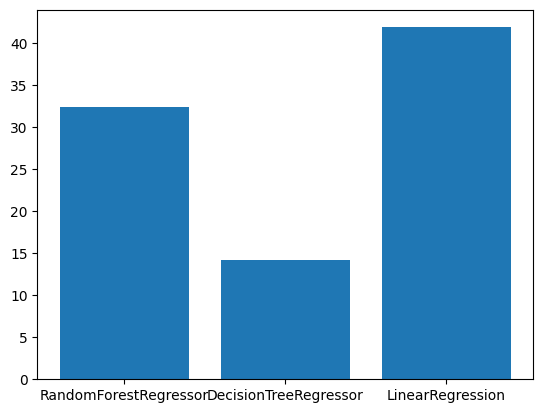

In [54]:
import matplotlib.pyplot as plt

plt.bar(errors.keys(),errors.values())

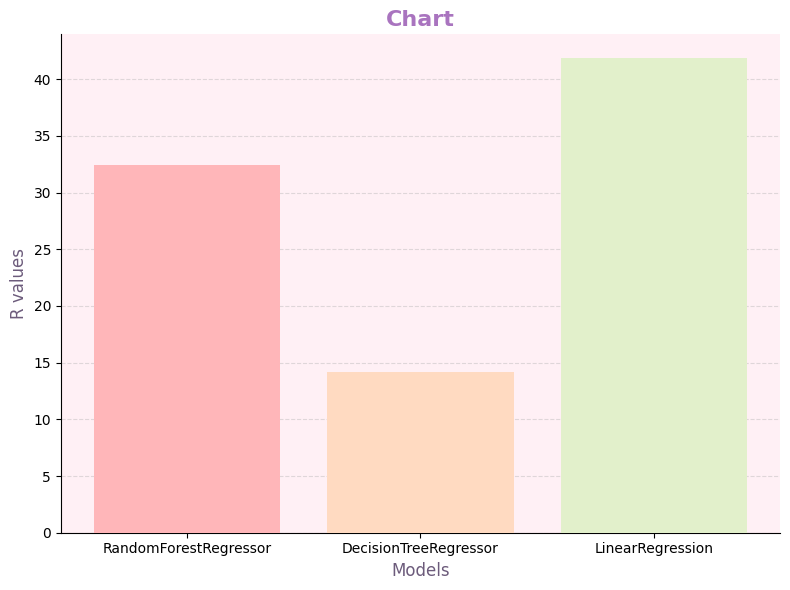

In [55]:
import matplotlib.pyplot as plt

# Sample data for demonstration (replace with your actual 'errors' dictionary)

# Define a cute pastel color palette
cute_colors = ['#FFB6B9', '#FFDAC1', '#E2F0CB', '#B5EAD7', '#C7CEEA']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(errors.keys(), errors.values(), color=cute_colors[:len(errors)])

# Add rounded edges to bars
for bar in bars:
    bar.set_linewidth(0)
    bar.set_edgecolor('none')
    bar.set_zorder(3)

# Add labels and title with cute fonts
plt.title('Chart', fontsize=16, fontweight='bold', color='#A974BF')
plt.xlabel('Models', fontsize=12, color='#6C5B7B')
plt.ylabel('R values', fontsize=12, color='#6C5B7B')

# Set background color
plt.gca().set_facecolor('#FFF0F5')  # Light lavender pink
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Remove top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## Model Evaluation Metrics

Let's calculate some additional evaluation metrics: Confusion Matrix, F1 Score, and Precision.

In [57]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate F1 Score
f1 = f1_score(Y_test, X_test_prediction)
print("\nF1 Score:", f1)

# Calculate Precision
precision = precision_score(Y_test, X_test_prediction)
print("Precision:", precision)

# Calculate Recall
recall = recall_score(Y_test, X_test_prediction)
print("Recall:", recall)

Confusion Matrix:
[[23  5]
 [ 6 27]]

F1 Score: 0.8307692307692308
Precision: 0.84375
Recall: 0.8181818181818182


#Building a Predictive System

In [56]:
input_data = (60,1,0,140,293,0,0,170,0,1.2,1,2,3)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Convert the reshaped numpy array to a pandas DataFrame with column names
input_data_df = pd.DataFrame(input_data_reshaped, columns=X_train.columns)

prediction = model.predict(input_data_df)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease🤗')
else:
  print()
  print('The Person has Heart Disease👀')

[0.13940801]

The Person has Heart Disease👀
